In [1]:
#Importing necessary Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading train and test csv files into dataframes

train_df = pd.read_csv('C:\\Users\\subhr\\Desktop\\ML_Abhilash\\Project\\train.csv')
test_df = pd.read_csv('C:\\Users\\subhr\\Desktop\\ML_Abhilash\\Project\\test.csv')

In [3]:
#Shape of the train and test dataframe

train_df.shape,test_df.shape

((4209, 378), (4209, 377))

In [4]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [6]:
#Viewing object datatype features in the train dataframe

train_df.select_dtypes(object)

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [7]:
#Creating new dataframe by dropping the object features

train_new_df = train_df.drop(train_df.select_dtypes(object),axis =1)

In [8]:
train_new_df.shape

(4209, 370)

In [9]:
#Checking for features with zero variance and subsequently dropping them

cols =list()
for i in range(len(train_new_df.columns)):
    if train_new_df[train_new_df.columns[i]].var()==0:
        cols.append(train_new_df.columns[i])
    else:
        continue
train_filt_df = train_new_df.drop(cols,axis=1)

In [10]:
#features with zero variance

print(cols)

['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [11]:
train_filt_df.shape

(4209, 358)

In [12]:
#checking for null values in the integer type features

for i,count in enumerate(range(train_filt_df.shape[1])):
    if train_filt_df.isnull().sum()[i]!=0:
        print(train_filt_df.isnull().sum().index[i])
    else:
        continue 

In [13]:
#Creating new dataframe with object features

train_cat_df = train_df[['X0','X1','X2','X3','X4','X5','X6','X8']]

In [14]:
#Checking for null values in the features

train_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X0      4209 non-null   object
 1   X1      4209 non-null   object
 2   X2      4209 non-null   object
 3   X3      4209 non-null   object
 4   X4      4209 non-null   object
 5   X5      4209 non-null   object
 6   X6      4209 non-null   object
 7   X8      4209 non-null   object
dtypes: object(8)
memory usage: 263.2+ KB


In [15]:
#Initialising label encoder for the purpose of integer encoding categorical values

le = LabelEncoder()

In [16]:
#Integer encoding the categorical features

for cols in list(train_cat_df.columns):
    train_cat_df[cols]=le.fit_transform(train_cat_df[cols])

<ipython-input-16-37d2c12523dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat_df[cols]=le.fit_transform(train_cat_df[cols])


In [17]:
#Integer encoded dataframe

train_cat_df

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16
4205,31,16,40,3,3,0,7,7
4206,8,23,38,0,3,0,6,4
4207,9,19,25,5,3,0,11,20


In [18]:
#Concatenating two dataframes to create the final train dataframe

train_final_df = pd.concat([train_cat_df,train_filt_df],axis=1)

In [19]:
train_final_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,ID,y,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,130.81,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,6,88.53,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,7,76.26,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,9,80.62,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,13,78.02,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Creating Independent and Dependent variables for the purpose of machine learning

X_train = train_final_df.drop(['ID','y'],axis=1)
Y_train = train_final_df['y']

In [21]:
# Initialising standardscaler and subsequently standardizing the Independent variable

ss = StandardScaler()
X_train = ss.fit_transform(X_train)

In [22]:
#Standardized variable

X_train

array([[ 0.16301209,  1.39348787, -0.02812155, ..., -0.04081511,
        -0.02180363, -0.03778296],
       [ 0.16301209,  1.15902093,  0.15538793, ..., -0.04081511,
        -0.02180363, -0.03778296],
       [-0.71055977,  1.51072134,  1.53170902, ..., -0.04081511,
        -0.02180363, -0.03778296],
       ...,
       [-1.58413164,  1.39348787,  1.89872798, ..., -0.04081511,
        -0.02180363, -0.03778296],
       [-1.51133398,  0.924554  ,  0.70591637, ..., -0.04081511,
        -0.02180363, -0.03778296],
       [ 1.18217927,  0.924554  , -1.31268791, ..., -0.04081511,
        -0.02180363, -0.03778296]])

In [23]:
#Initializing PCA for dimensionality reduction

pca = PCA()

In [24]:
#fitting the independent variables

pca.fit(X_train)

PCA()

In [25]:
#Displaying the percentage of variation each features have in dependent variable

pca.explained_variance_ratio_

array([6.89266892e-02, 5.68841213e-02, 4.53745695e-02, 3.42677135e-02,
       3.26430877e-02, 3.16266067e-02, 2.86252442e-02, 2.12375123e-02,
       1.97041337e-02, 1.78319550e-02, 1.64006646e-02, 1.56428622e-02,
       1.46274226e-02, 1.44833491e-02, 1.34828580e-02, 1.29516175e-02,
       1.24383219e-02, 1.17310333e-02, 1.12105051e-02, 1.07727793e-02,
       9.92512898e-03, 9.69449157e-03, 9.42523076e-03, 9.09867975e-03,
       8.74223908e-03, 8.43069482e-03, 7.90204943e-03, 7.63217614e-03,
       7.33541876e-03, 7.14905572e-03, 6.92957269e-03, 6.76677298e-03,
       6.52534438e-03, 6.41494089e-03, 6.22692040e-03, 5.99196153e-03,
       5.88086185e-03, 5.74693562e-03, 5.63702738e-03, 5.53409616e-03,
       5.50641149e-03, 5.40082599e-03, 5.33910600e-03, 5.24611598e-03,
       5.10194247e-03, 5.03232420e-03, 4.95885463e-03, 4.72691565e-03,
       4.64475228e-03, 4.56521484e-03, 4.39624472e-03, 4.32947533e-03,
       4.30322432e-03, 4.23762131e-03, 4.20211958e-03, 4.15473420e-03,
      

<BarContainer object of 364 artists>

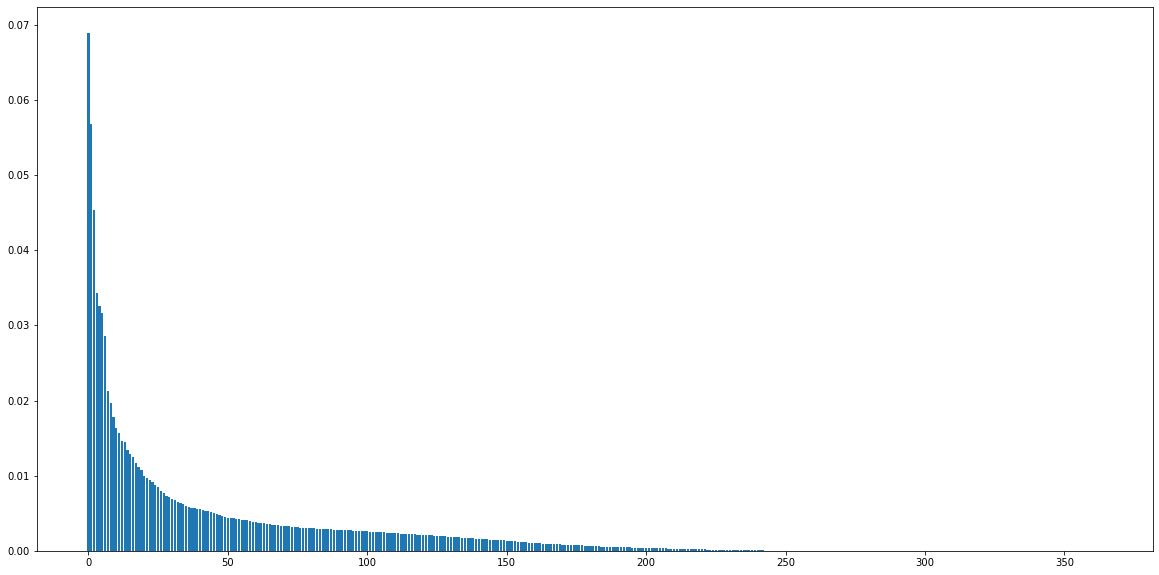

In [26]:
#plotting bar plot between number of features and percentage of variation that each feature holds

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)

<BarContainer object of 364 artists>

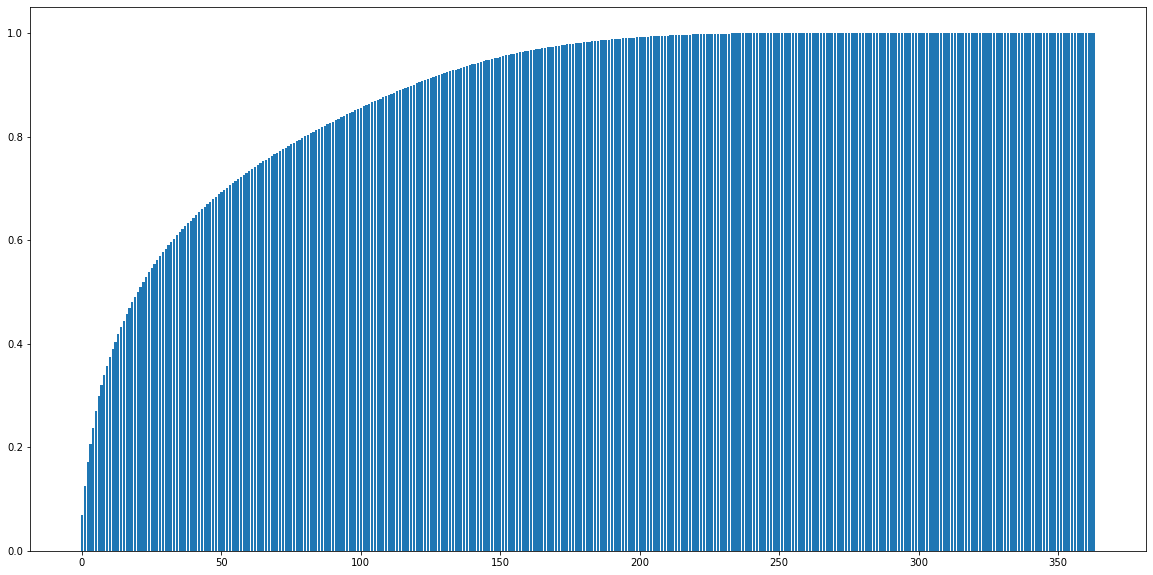

In [27]:
#plotting the cumulative sum of the variation of each features

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_.cumsum())

In [28]:
#cummulative sum of the percentage of variation

var_per=pca.explained_variance_ratio_.cumsum()

In [29]:
#finding out the number of features that cumulatively shows atleast 95% of variation in the dependent variable

var_per[var_per<0.95].shape

(147,)

In [30]:
#Initializing PCA to reduce the number of dimensions to n components

pca = PCA(n_components=147)

In [31]:
X_trsf_train = pca.fit_transform(X_train)

In [32]:
X_trsf_train.shape

(4209, 147)

<h3> The same above steps are followed to prepare the test dataframe for prediction</h3>

In [33]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
test_new_df = test_df.drop(test_df.select_dtypes(object),axis =1)

In [35]:
test_new_df.shape

(4209, 369)

In [36]:
cols =list()
for i in range(len(test_new_df.columns)):
    if test_new_df[test_new_df.columns[i]].var()==0:
        cols.append(test_new_df.columns[i])
    else:
        continue
test_filt_df = test_new_df.drop(cols,axis=1)

In [37]:
print(cols)

['X257', 'X258', 'X295', 'X296', 'X369']


In [38]:
test_filt_df.shape

(4209, 364)

In [39]:
test_cat_df = test_df[['X0','X1','X2','X3','X4','X5','X6','X8']]

In [40]:
le = LabelEncoder()
for cols in list(test_cat_df.columns):
    test_cat_df[cols]=le.fit_transform(test_cat_df[cols])

<ipython-input-40-7e66946e0a4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cat_df[cols]=le.fit_transform(test_cat_df[cols])


In [41]:
test_final_df = pd.concat([test_cat_df,test_filt_df],axis=1)
X_test = test_final_df.drop('ID',axis=1)

In [42]:
ss = StandardScaler()
X_test = ss.fit_transform(X_test)

In [43]:
pca = PCA(n_components=147)

In [44]:
pca.fit(X_test)

PCA(n_components=147)

In [45]:
X_trsf_test = pca.fit_transform(X_test)

In [46]:
#Initializing xgboost regressor 

xgbreg = XGBRegressor()

In [47]:
#fitting the training data

xgbreg.fit(X_trsf_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [48]:
#predicting using the test data

pred = xgbreg.predict(X_trsf_test)

In [49]:
#Displaying the predictions

pred

array([ 91.849434, 102.969574,  86.596405, ..., 100.17861 , 114.39094 ,
        94.83634 ], dtype=float32)

In [50]:
pred

array([ 91.849434, 102.969574,  86.596405, ..., 100.17861 , 114.39094 ,
        94.83634 ], dtype=float32)